Installing dependencies:

In [1]:
!pip install numpy pandas matplotlib seaborn
!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataset and selecting relevant data: 

In [3]:
music_df = pd.read_csv("datos_merged_1986_2023.csv")

In [4]:
newmusicdf = music_df[['artists_names', 'popularity', 'year', 'duration_ms', 'danceability', 'valence', 'tempo', 'energy']]

In [5]:
newmusicdf = newmusicdf[(newmusicdf['year'] >= 2019)]

In [14]:
newmusicdf = newmusicdf.dropna()
newmusicdf.head()

,duration_ms,danceability,valence,tempo,energy,popular,artist_popular_count
10000,218280,0.585,0.839,78.176,0.550,1,3
10001,131240,0.745,0.226,179.974,0.642,1,3
10002,176531,0.870,0.692,110.017,0.498,0,1
10003,174000,0.548,0.557,95.390,0.816,1,14
10004,190066,0.554,0.413,79.635,0.498,1,5


Creating new columns which will help in the random forest model:

In [7]:
newmusicdf['popular'] = (newmusicdf['popularity'] > 80).astype(int)

In [9]:
popular_songs = newmusicdf[newmusicdf['popular'] == 1]
artist_popularity_counts = popular_songs['artists_names'].value_counts()
newmusicdf['artist_popular_count'] = newmusicdf['artists_names'].map(artist_popularity_counts).fillna(0).astype(int)

In [13]:
newmusicdf = newmusicdf.drop(['popularity', 'artists_names', 'year'], axis=1)

Bar graph for distribution of popular songs:

<Axes: xlabel='popular', ylabel='count'>

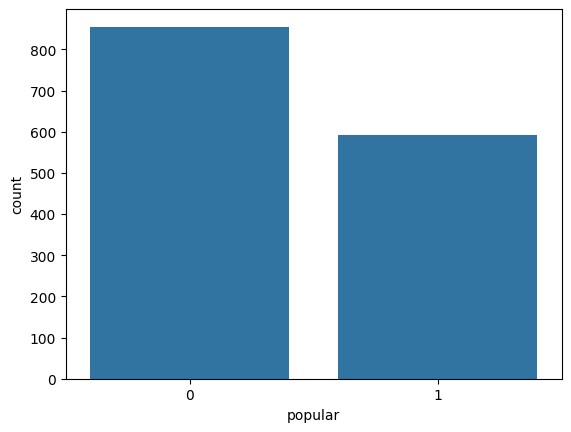

In [31]:
newmusicdf['popular'].value_counts()
sns.countplot(x = 'popular', data=newmusicdf)

Training the model and creating test data:

In [16]:
X = newmusicdf.drop(columns=['popular'])
y = newmusicdf['popular']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn import tree

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

Creating a decision tree:

In [20]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [21]:
clf.score(X_test, y_test)

0.6862068965517242

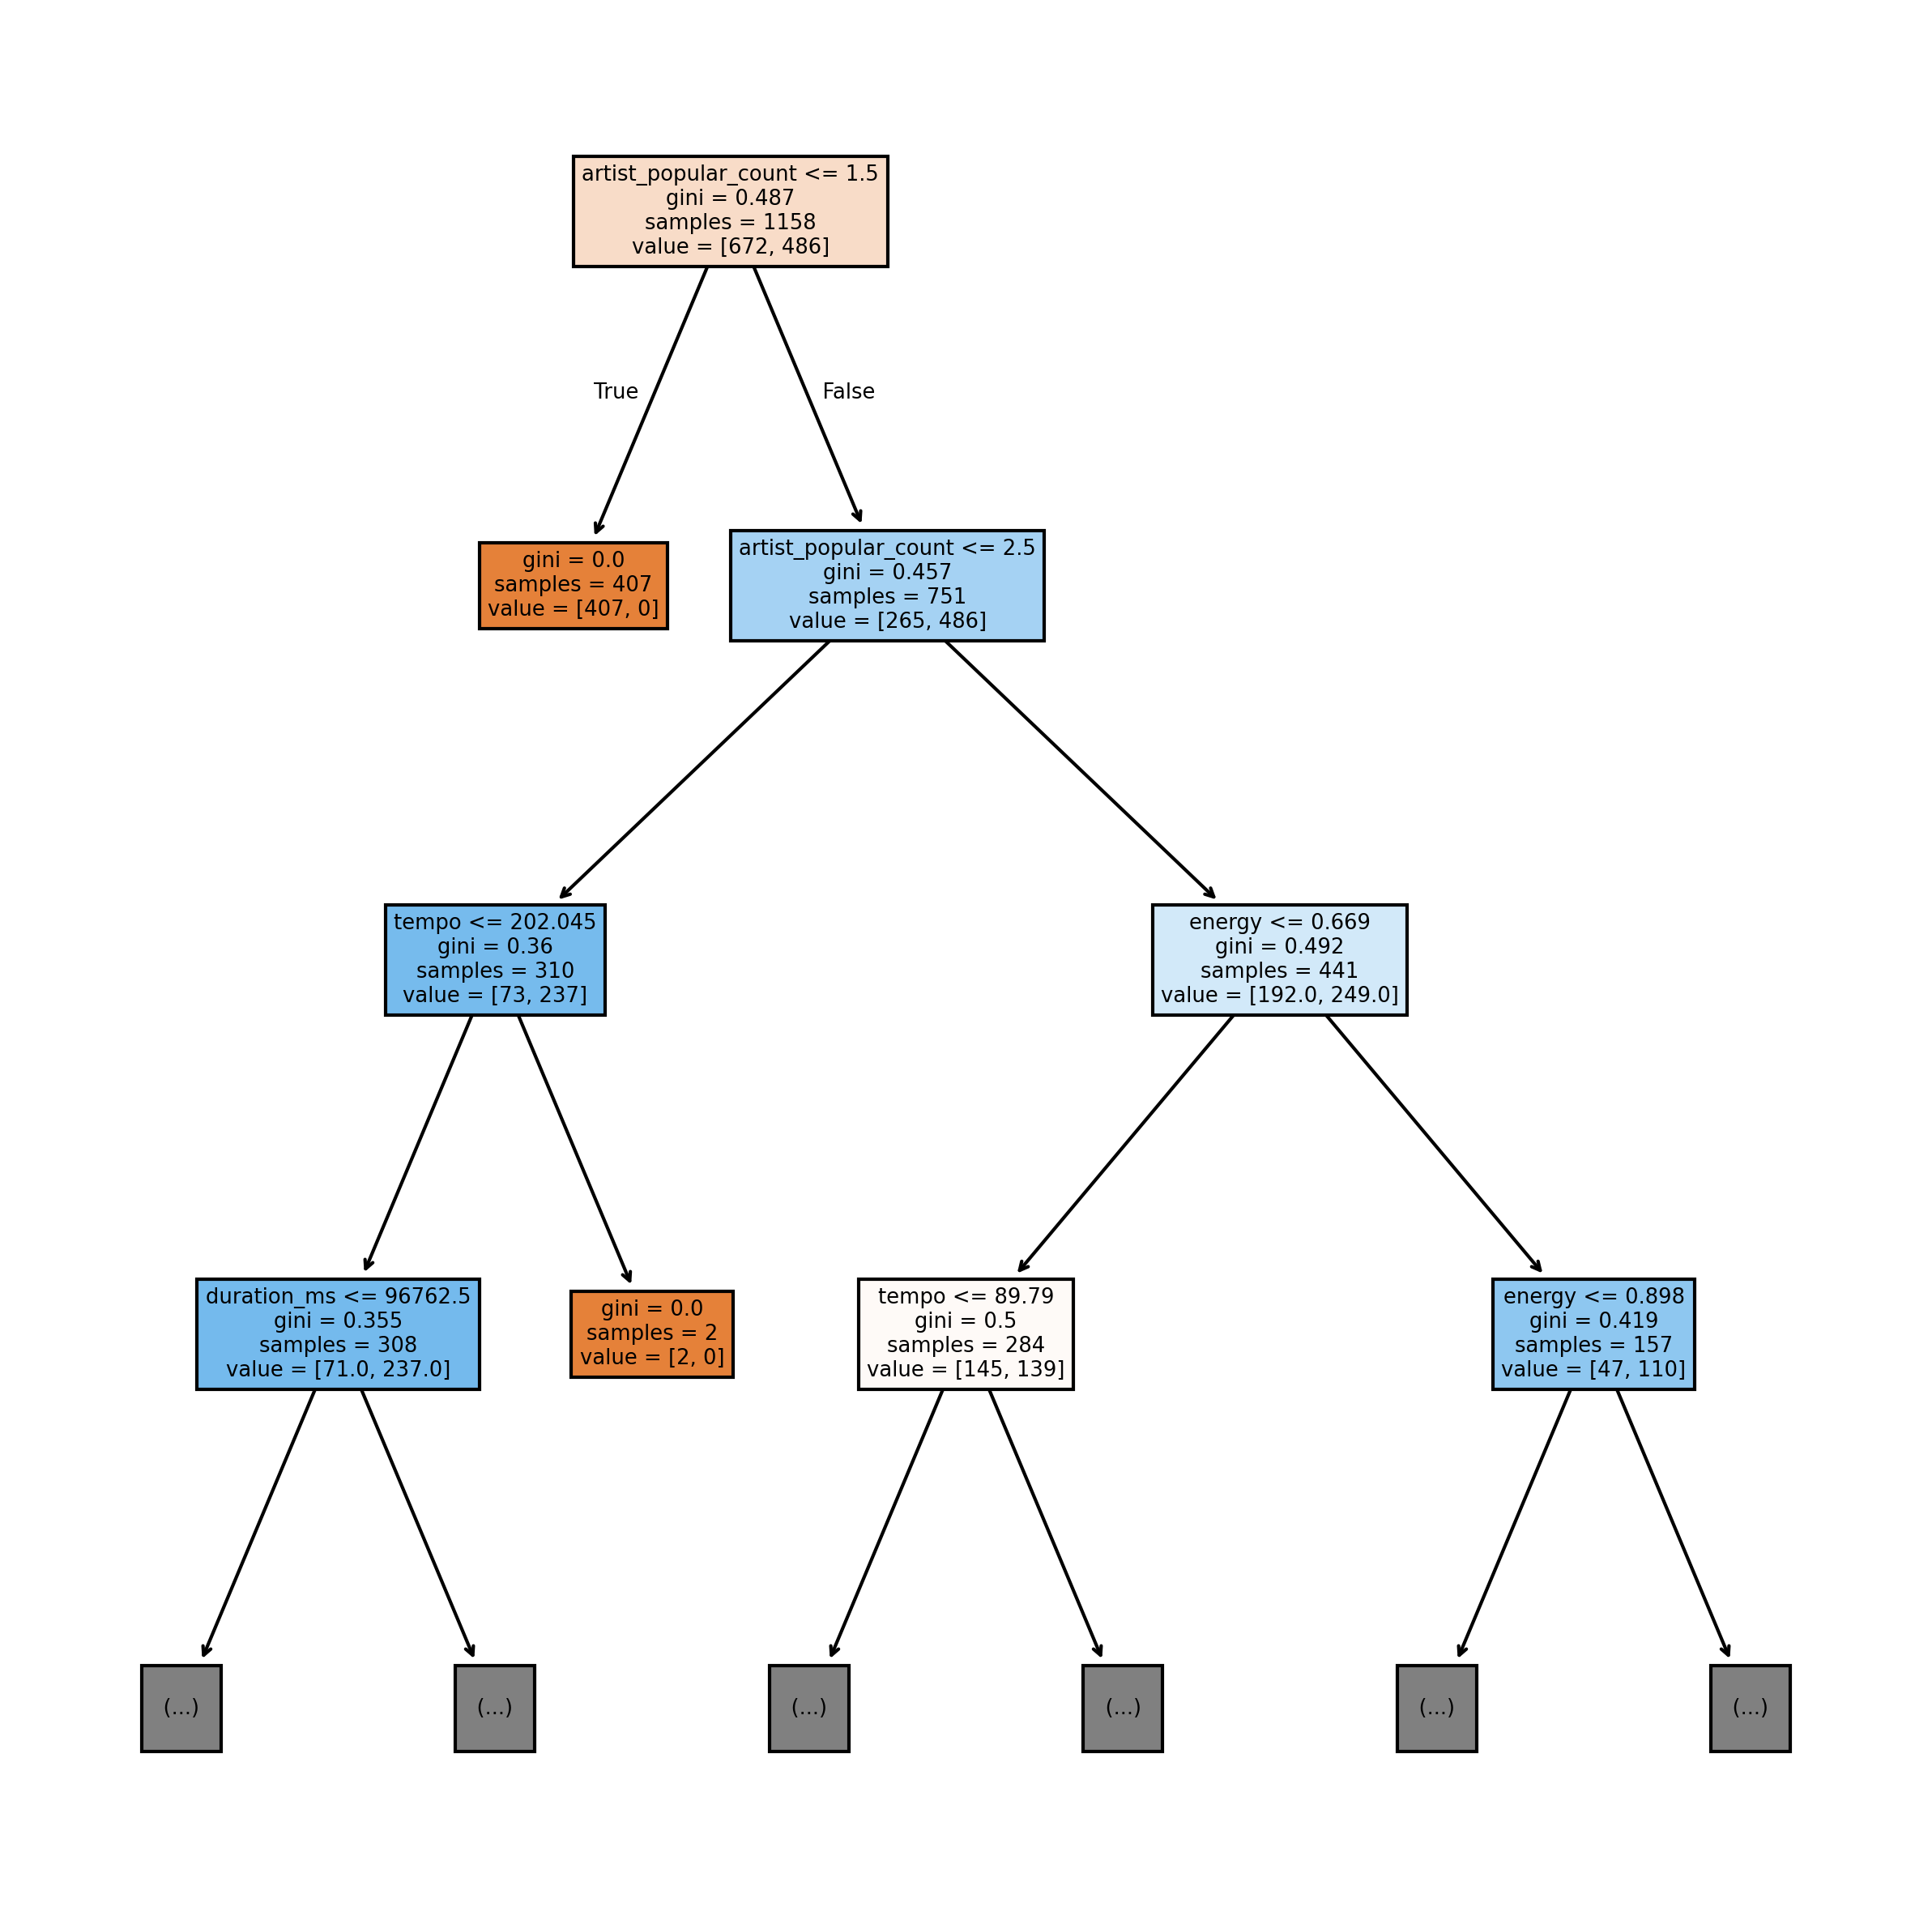

In [22]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (10,10), dpi=300)
tree.plot_tree(clf, max_depth = 3, feature_names = X.columns, filled=True)
plt.show()

Creating the random forest model:

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
random = RandomForestClassifier(n_estimators=100)
random.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
prediction = random.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

Measuring accuracy and testing the model with an example song:

In [28]:
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 73.79%


In [29]:
testsong = [[210000, 0.7, 0.5, 120, 0.8, 5]]

In [30]:
answer = random.predict(testsong)
if answer == 1:
    print("Popular")
else:
    print("Not Popular")

Popular


c:\Users\Shon\Documents\DataMining\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
